C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


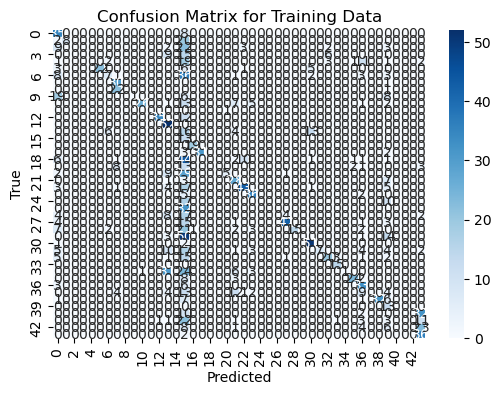

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Perceptron Model Performance on Training Data:
Accuracy: 0.3778
Precision: 0.4913
Recall: 0.3778
F1-Score: 0.3515



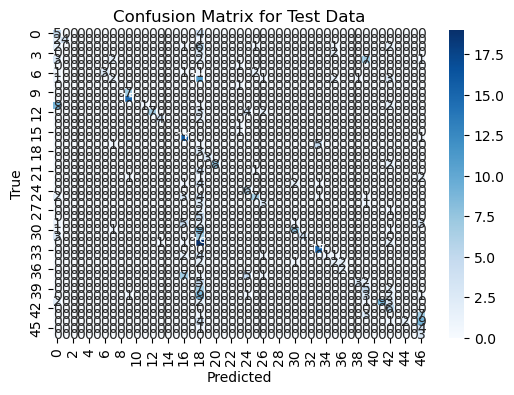

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Perceptron Model Performance on Test Data:
Accuracy: 0.3089
Precision: 0.4233
Recall: 0.3089
F1-Score: 0.2894


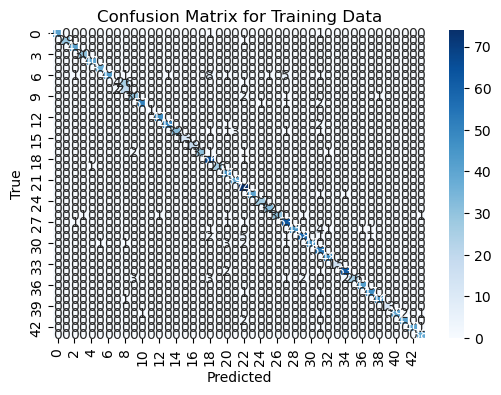

Best MLP Model Performance on Training Data:
Accuracy: 0.9233
Precision: 0.9352
Recall: 0.9233
F1-Score: 0.9207



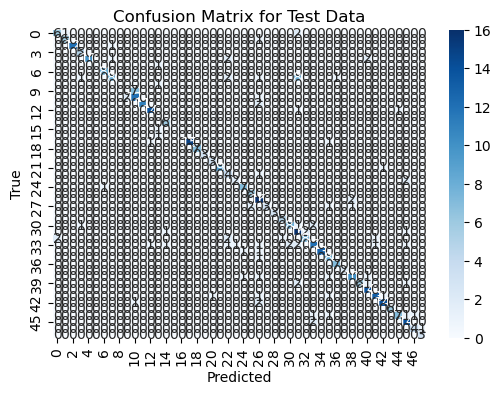

Best MLP Model Performance on Test Data:
Accuracy: 0.7689
Precision: 0.7941
Recall: 0.7689
F1-Score: 0.7641


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
!pip install openpyxl

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

def load_and_split_data(file_path, sheet_name=0, test_size=0.2, random_state=42):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    X = df.iloc[:, :-1]  # Features (all columns except last)
    y = df.iloc[:, -1]   # Target (last column)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def tune_perceptron(X_train, y_train):
    perceptron = Perceptron(random_state=42)
    param_distributions = {
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': uniform(0.0001, 0.01),
        'eta0': uniform(0.01, 0.1),
        'max_iter': randint(500, 2000)
    }
    
    random_search = RandomizedSearchCV(
        perceptron, 
        param_distributions=param_distributions, 
        n_iter=10, 
        cv=5, 
        random_state=42, 
        n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

def tune_mlp(X_train, y_train):
    mlp = MLPClassifier(random_state=42)
    param_distributions = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': uniform(0.0001, 0.01),
        'learning_rate': ['constant', 'adaptive']
    }
    
    random_search = RandomizedSearchCV(
        mlp, 
        param_distributions=param_distributions, 
        n_iter=10, 
        cv=5, 
        random_state=42, 
        n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

def evaluate_performance(model, X, y_true, dataset_name="Data"):
    y_pred = model.predict(X)
    
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {dataset_name} Data")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)

    return accuracy, precision, recall, f1

def main():
    file_path = r"C:/Users/Admin/Documents/DCT_withoutduplicate_3.xlsx"  
    
    X_train, X_test, y_train, y_test = load_and_split_data(file_path)

    best_perceptron_model = tune_perceptron(X_train, y_train)
    
    accuracy_train, precision_train, recall_train, f1_train = evaluate_performance(best_perceptron_model, X_train, y_train, dataset_name="Training")
    
    print("Best Perceptron Model Performance on Training Data:")    
    print(f"Accuracy: {accuracy_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"F1-Score: {f1_train:.4f}")
    print()
    
    accuracy_test, precision_test, recall_test, f1_test = evaluate_performance(best_perceptron_model, X_test, y_test, dataset_name="Test")
    
    print("Best Perceptron Model Performance on Test Data:")    
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1-Score: {f1_test:.4f}")
    
    best_mlp_model = tune_mlp(X_train, y_train)

    accuracy_train_mlp, precision_train_mlp, recall_train_mlp, f1_train_mlp = evaluate_performance(best_mlp_model, X_train, y_train, dataset_name="Training")
    
    print("Best MLP Model Performance on Training Data:")    
    print(f"Accuracy: {accuracy_train_mlp:.4f}")
    print(f"Precision: {precision_train_mlp:.4f}")
    print(f"Recall: {recall_train_mlp:.4f}")
    print(f"F1-Score: {f1_train_mlp:.4f}")
    print()
    
    accuracy_test_mlp, precision_test_mlp, recall_test_mlp, f1_test_mlp = evaluate_performance(best_mlp_model, X_test, y_test, dataset_name="Test")
    
    print("Best MLP Model Performance on Test Data:")    
    print(f"Accuracy: {accuracy_test_mlp:.4f}")
    print(f"Precision: {precision_test_mlp:.4f}")
    print(f"Recall: {recall_test_mlp:.4f}")
    print(f"F1-Score: {f1_test_mlp:.4f}")

if __name__ == "__main__":
    main()



In [34]:
!pip install catboost xgboost

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
from catboost import CatBoostClassifier

def load_and_split_data(file_path, sheet_name=0, test_size=0.2, random_state=42):
    """Load data from an XLSX file and split it into training and testing sets."""
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    X = df.iloc[:, :-1] 
    y = df.iloc[:, -1]   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def evaluate_performance(model, X, y_true):
    """Evaluate the model's performance."""
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def main():
    file_path = r"C:/Users/Admin/Documents/DCT_withoutduplicate_3.xlsx"  
    
    X_train, X_test, y_train, y_test = load_and_split_data(file_path)

    classifiers = {
        "Perceptron": Perceptron(random_state=42),
        "SVM": SVC(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42),
        "Naive Bayes": GaussianNB(),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
    }

    results = []

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        accuracy, precision, recall, f1 = evaluate_performance(clf, X_test, y_test)
        results.append({
            "Classifier": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })

    results_df = pd.DataFrame(results)
    print(results_df)

if __name__ == "__main__":
    main()


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packag

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43], got [3333 3334 3335 3337 3342 3346 3349 3351 3352 3353 3354 3355 3356 3359
 3360 3361 3362 3363 3364 3365 3366 3367 3368 3370 3371 3372 3373 3374
 3375 3376 3377 3378 3379 3380 3381 3382 3383 3384 3385 3450 3451 3452
 3453 3454]